<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JuneLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

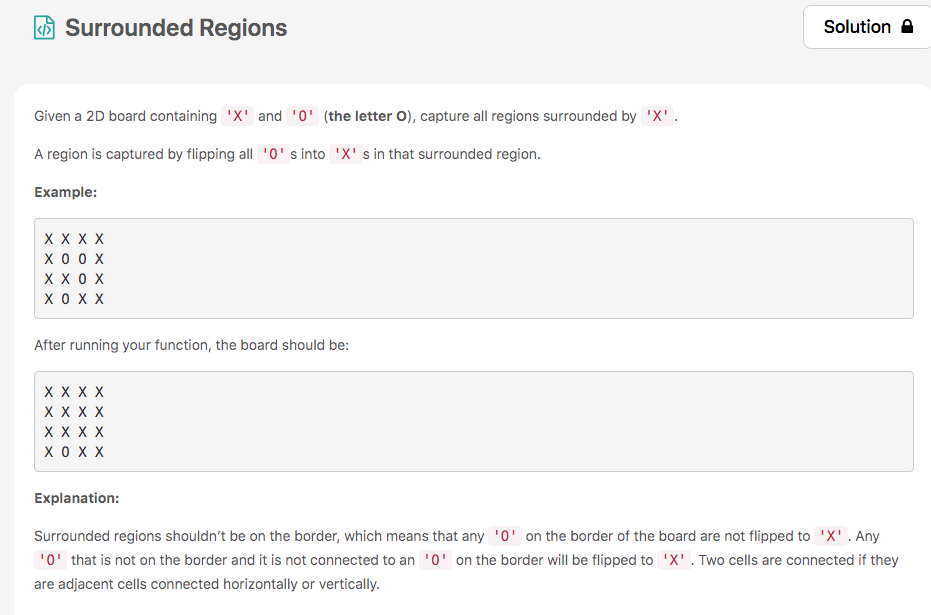

In [ ]:
'''June 17, 
same as counting island, using DFS
'''
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board or not board[0]:
            return 
        lenx,leny = len(board[0]), len(board)
        
        # Stack of cells to be checked 
        Expand = []
        
        # Put all the edge celss to the Stack
        for y in range(leny):
            Expand += [(y,0), (y,lenx -1)]
        for x in range(1,lenx -1):
            Expand += [(0,x), (leny -1,x)]
        
        # If cell contains 'O' temporary change it to 't' and add neighbours to stack
        while Expand:
            y, x = Expand.pop()
            # check limit out of bound values or 'X' will be ignored here. 
            if 0 <= y < leny and 0 <= x < lenx and board[y][x] == 'O': 
                board[y][x] = 'T'
                for dy, dx in [(1,0),(0,1),(-1,0),(0,-1)]:
                    Expand.append((y + dy,x + dx)) # these can go out of bound 
         # Change all the 'T' back to 'O' and all the 'O' to 'X'         
        for y in range(leny):
            for x in range(lenx):
                if board[y][x] == 'O':
                    board[y][x] = 'X'
                elif board[y][x] == 'T':
                    board[y][x] = 'O'


'''Using DFS '''

class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return None
        m, n = len(board), len(board[0])

        # Use DFS to all the edges that contain 'O'
        for i in range(m):
            if board[i][0] == "O":
                self.dfs(i,0,board)
            if board[i][n-1] == "O":
                self.dfs(i,n-1,board)
        for j in range(n):
            if board[0][j] == "O":
                self.dfs(0,j,board)
            if board[m-1][j] == "O":
                self.dfs(m-1,j,board)
        
        # After finished changing all 'O' at the edges to 'N'
        for i in range(m):
            for j in range(n):
                if board[i][j] != "N":
                    board[i][j] = "X" # The rest elements to 'X'
                else:
                    board[i][j] = "O" # change 'N' to 'O'
    
    
    def dfs(self, i, j, board):
        m, n = len(board), len(board[0])
        if 0 <= i < m and 0 <= j < n and board[i][j] == "O":
            # to temporary change 'O' at the edges to 'N'
            board[i][j] = "N"  
            self.dfs(i+1,j,board)
            self.dfs(i-1,j,board)
            self.dfs(i,j+1,board)
            self.dfs(i,j-1,board)

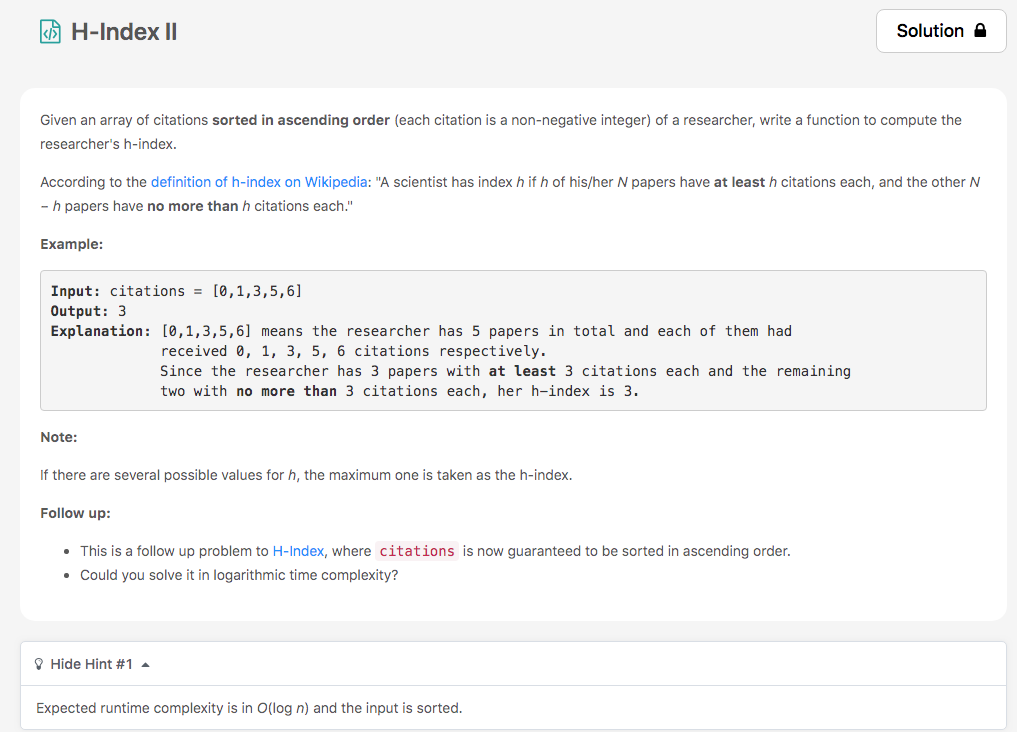

In [ ]:
''' June 17
H-Index II
Given an array of citations sorted in ascending order (each citation is a non-negative integer) of a researcher, write a function to compute the researcher's h-index.

According to the definition of h-index on Wikipedia: "A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."
'''
# Example:

# Input: citations = [0,1,3,5,6]
# Output: 3 
# Explanation: [0,1,3,5,6] means the researcher has 5 papers in total and each of them had 
#              received 0, 1, 3, 5, 6 citations respectively. 
#              Since the researcher has 3 papers with at least 3 citations each and the remaining 
#              two with no more than 3 citations each, her h-index is 3.

''' Note:
If there are several possible values for h, the maximum one is taken as the h-index.
'''

# bruteforce : time limit exceed
class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            for h in range(len(citations),0,-1):
                count = sum(map(lambda x : x>=h, citations))
                if count >= h:
                    return h
        return 0   

# Tracking it while iterate 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if citations:
            ci_len = len(citations)
            for i in range(ci_len,0,-1):
                if citations[ci_len - i] >= i:
                    return i
         
        return 0   


# Fastest 128 ms using binary search

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        if not citations:
            return 0
        
        left = 0
        right = len(citations)-1
        
        while left < right:
            mid = left + (right-left)//2
            
            if citations[mid] < len(citations) - mid:
                left = mid + 1
            else:
                right = mid
        
        return len(citations) - right if citations[right] >= (len(citations) - right) else 0

# 135 ms using binary search 

class Solution:
    def hIndex(self, citations: List[int]) -> int:
        n = len(citations)
        l, r = 0, n
        while l < r:
            idx = (l + r)//2
            if n - idx - 1 < citations[idx]:
                r = idx
            else:
                l = idx + 1
        return n - l

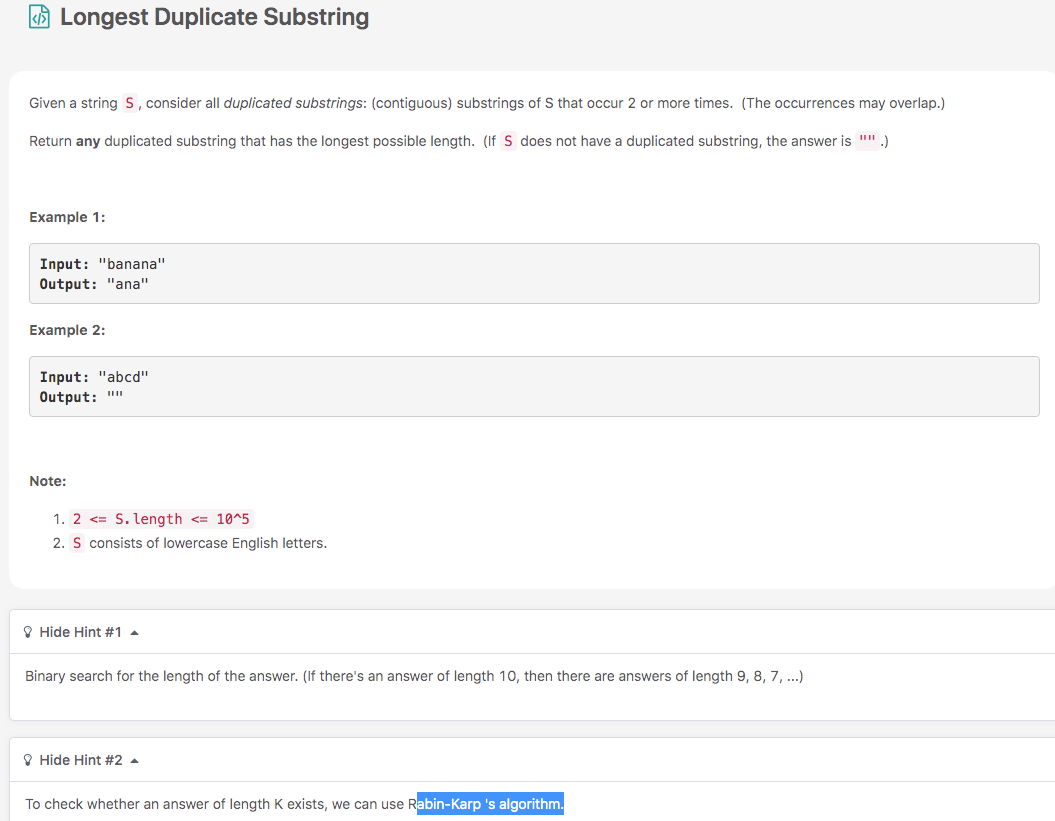

In [ ]:
''' June 19.  Longest Duplicate Substring
https://leetcode.com/problems/longest-duplicate-substring/discuss/695029/Python-Binary-search-O(n-log-n)-average-with-Rabin-Karp-explained

Example 1:
Input: "banana"
Output: "ana"

Example 2:
Input: "abcd"
Output: ""
 

Note:
2 <= S.length <= 10^5
S consists of lowercase English letters.
'''
# I have RabinKarp(text, M,q) function, where text is the string where we search patterns, M is the length we are looking for and q is prime modulo for Rabin-Karp algorighm.

# First, we need to choose d, I chose d = 256, because it is more than ord(z).
# Then we need to evaluate auxiliary value h, we need it for fast update of rolling hash.
# Evalute hash for first window
# Evaluate hashes for all other windows in O(n), using evaluated h.
# We keep all hashes in dictionary: for each hash we keep start indexes of windows.
# Finally, we iterate over our dictionary and for each unique hash we check all possible combinations and compare not hashes, but original windows to make sure that it was not a collision.

class Solution:
    def longestDupSubstring(self, S: str) -> str:
        def RK(text, M, q):
            if M == 0: return True
            h, t, d = (1<<(8*M-8))%q, 0, 256

            dic = defaultdict(list)

            for i in range(M): 
                t = (d * t + ord(text[i]))% q

            dic[t].append(i-M+1)

            for i in range(len(text) - M):
                t = (d*(t-ord(text[i])*h) + ord(text[i + M]))% q
                for j in dic[t]:
                    if text[i+1:i+M+1] == text[j:j+M]:
                        return (True, text[j:j+M])
                dic[t].append(i+1)
            return (False, "")
        
        
        beg, end = 0, len(S)
        q = (1<<31) - 1 
        Longest = ""
        
        while beg + 1 < end:
            mid = (beg + end)//2
            isLongest, candidate = RK(S, mid, q)
            if isLongest:
                beg, Longest = mid, candidate
            else:
                end = mid
        return Longest
                
                


In [ ]:
# Fastest solution 1190ms
# These following answers need to be commented carefully. 

MODULO = 100000000487  # prime

class Solution:
    def longestDupSubstring(self, S: str) -> str:
        ords = bytes(ord(c) - ord('a') for c in S)
        
        cumulatives = [0]
        for o in ords:
            cumulatives.append(
                ( cumulatives[-1] * 26 + o) % MODULO
            )

        def _duplicate(length):
            MULT = pow(26, length + 1, MODULO)
            hsh = cumulatives[length + 1]
            seen = {hsh}
            for start in range(1, len(S) - length):
                hsh = ((26 * hsh - MULT * ords[start - 1]) + ords[start + length]) % MODULO
                if hsh in seen:
                    return start
                seen.add(hsh)
            return None

        best = None
        best_len = -1
                
        left = 0
        right = len(S) - 1
        
        while right - left >= 2:
            middle = (left + right) // 2
            cand = _duplicate(middle)
            cand_len = middle + 1
            if cand is not None:
                if cand_len > best_len:
                    best = cand
                    best_len = cand_len
                    
                left = middle + 1
            else:
                right = middle - 1

        if best_len < left + 1:
            new_cand = _duplicate(left)
            if new_cand is not None:
                best = new_cand
                best_len = left + 1
                new_cand = _duplicate(right)
                if new_cand is not None:
                    best = new_cand
                    best_len = right + 1
        
        if best is None:
            return ''
        
        return S[best:best + best_len]



#2nd fastest solution
class Solution:
    def longestDupSubstring(self, S: str) -> str:        
        def search(L, nums, modulus, base, N):
            h = 0
            for i in range(L):
                h = (h*base + nums[i]) % modulus
            
            seen = {h}
            aL = pow(base, L, modulus)
            for i in range(N-L):
                h = (h * base - nums[i]*aL + nums[L+i]) % modulus
                if h in seen:
                    return i+1
                seen.add(h)
                
            return -1
        
        
        nums = [ord(c) - 97 for c in S]
        
        N = len(S)
        left, right = 1, N
        while left < right:
            L = (left + right)//2
            idx = search(L, nums, 4294967296, 26, N)
            #print(L, idx)
            if idx > -1:
                left = L+1
            else:
                right = L
        
        #print(left)
        if left:
            start = search(left-1, nums, 4294967296, 26, N)
            return S[start:start+left-1]
        return ''

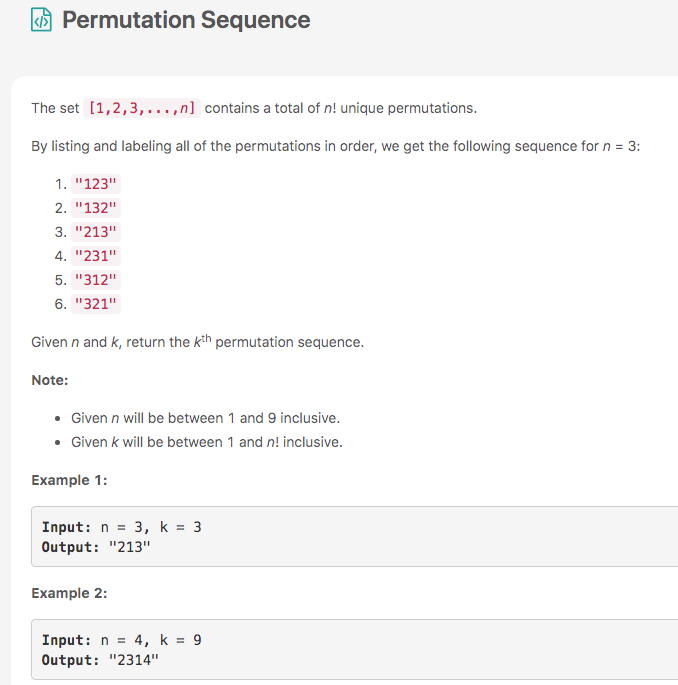

In [ ]:

''' June 20 Phone solution. 28 ms
'''
class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        from math import factorial
        # Find each digit according to the ratio between k
        # and the total number of possible permutations
        # time - O(n**2) each iteration adds 1 digit and 09n for del from list
        # Space - O(n) to store chars list
        chars = [str(i) for i in range(1, n+1)] # symbols that will be permuted 
        permutations = factorial(n) # total number of permutations for n
        k -= 1 # change index to zero
        ret = []
        
        while chars:
            digit = n*k // permutations # get the 1st digit (range is 0 to n-1)
            ret.append(chars[digit])    # map from digit to symbol
            del chars[digit]            # remove that symbol
            permutations //= n          # repeat for next degit with decreased permutations, n & k
            k -=  digit * permutations
            n -= 1

        return "".join(ret)


### Fastest solutioin  12ms

class Solution(object):
    def get_factorial(self, n):
        factorial = 1
        for i in range(1, n + 1):
            factorial *= i
        return factorial
    def getPermutation(self, n, k):
        # * the symbols that will be permuted
        chars = [str(i) for i in range(1, n + 1)]
        # * total number of permutations for this n
        k -= 1  # * change indexing to 0
        permutations = self.get_factorial(n)
        result = []

        while chars:
            # * get the first digit (range is 0 to n-1)
            digit = n * k // permutations
            result.append(chars[digit])  # * map from digit to a symbol
            del chars[digit]  # * remove that symbol
            # * repeat for next digit with decreased permutations, n and k
            permutations //= n
            k -= digit * permutations
            n -= 1

        return "".join(result)


## 2nd Fastest solution 16 ms 
# using DFS pretty fast. 

class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        nums = [str(i+1) for i in range(n)]
        
        def dfs(remainNums, remainK):
            if len(remainNums) == 1:
                return remainNums[0]
            
            div, mod = divmod(remainK-1, factorial(len(remainNums)-1))
            return remainNums[div] + dfs(remainNums[:div] + remainNums[div+1:], mod+1)
        
        return dfs(nums, k)

# 20 ms solution

class Solution:
    def getPermutation(self, n: int, k: int) -> str:
        nums = [str(i+1) for i in range(n)]
        factorials = [1]
        
        for i in range(1, n):
            factorials.append(factorials[-1] * i)
        
        k -= 1
        
        result = ""
        for i in range(n-1, -1, -1):
            idx = k // factorials[i]
            k -= idx * factorials[i]
            
            result += nums[idx]
            
            del nums[idx]
        
        return result